# Dunham's Data

## Setting up

In [329]:
import math

import pandas as pd
import seaborn as sns

In [330]:
# pd.set_option('display.max_rows', 999)

In [331]:
# sns.set()

In [332]:
# %matplotlib inline

## Loading data

In [333]:
itinerary_df = pd.read_csv('data/out/itinerary_1955-92.csv')
itinerary_df.fillna('', inplace=True)

In [334]:
itinerary_df.shape

(123, 10)

In [335]:
itinerary_df

,START_DATE,END_DATE,CITY,COUNTRY,N_ROWS,LAST_MOMENT,MIN_NIGHTS,MAX_NIGHTS,LATITUDE,LONGITUDE
0,1955-01-01 00:00:00,1955-01-01 00:00:00,Moscow,Russia,1,Probably that night,0,1,55.750541,37.617478
1,1955-08-24 00:00:00,1958-03-02 00:00:00,Leningrad,Russia,13,Probably that night,12,13,59.938732,30.316229
2,1958-04-21 00:00:00,1958-05-22 00:00:00,Moscow,Russia,4,Probably that night,3,4,55.750541,37.617478
3,1958-06-19 00:00:00,1959-06-28 00:00:00,Leningrad,Russia,15,Probably that night,14,15,59.938732,30.316229
4,1959-07-26 00:00:00,1959-08-04 00:00:00,Vienna,Austria,2,Probably that night,1,2,48.208354,16.372504
...,...,...,...,...,...,...,...,...,...,...
118,1992-01-01 00:00:00,1992-01-01 00:00:00,Vienna,Austria,1,Probably that night,0,1,48.208354,16.372504
119,1992-02-28 00:00:00,1992-02-28 00:00:00,Budapest,Hungary,1,Probably that night,0,1,47.497879,19.040238
120,1992-02-29 00:00:00,1992-02-29 00:00:00,Berlin,Germany,1,Probably that night,0,1,52.510885,13.398937
121,1992-03-01 00:00:00,1992-03-01 00:00:00,Budapest,Hungary,1,Probably that night,0,1,47.497879,19.040238


## Pre-processing data

In [336]:
itinerary_df = itinerary_df[pd.to_datetime(itinerary_df.START_DATE) < '1993'].copy()
itinerary_df.tail()

,START_DATE,END_DATE,CITY,COUNTRY,N_ROWS,LAST_MOMENT,MIN_NIGHTS,MAX_NIGHTS,LATITUDE,LONGITUDE
118,1992-01-01 00:00:00,1992-01-01 00:00:00,Vienna,Austria,1,Probably that night,0,1,48.208354,16.372504
119,1992-02-28 00:00:00,1992-02-28 00:00:00,Budapest,Hungary,1,Probably that night,0,1,47.497879,19.040238
120,1992-02-29 00:00:00,1992-02-29 00:00:00,Berlin,Germany,1,Probably that night,0,1,52.510885,13.398937
121,1992-03-01 00:00:00,1992-03-01 00:00:00,Budapest,Hungary,1,Probably that night,0,1,47.497879,19.040238
122,1992-10-08 00:00:00,31/8/1992,Paris,France,2,Probably that night,1,2,48.858890,2.320041


In [337]:
first_date = pd.to_datetime(itinerary_df.START_DATE.iloc[0].split('-')[0])
last_date = pd.to_datetime(itinerary_df.END_DATE.iloc[-1])
total_days = (last_date - first_date).days + 1

C:\Users\mricci\AppData\Local\Temp\ipykernel_31076\4204671717.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  last_date = pd.to_datetime(itinerary_df.END_DATE.iloc[-1])


In [338]:
total_days

13758

In [339]:
itinerary_df['GROUP'] = 0
group = 1
itinerary_df.loc[0, 'GROUP'] = group
for i, row in itinerary_df[1:].iterrows():
    prev_row = itinerary_df.loc[i-1]
    prev_row_end_date = pd.to_datetime(prev_row['END_DATE'])
    curr_row_start_date = pd.to_datetime(row['START_DATE'])
    n_days = (curr_row_start_date - prev_row_end_date).days
    if n_days == 0:
        print('ERROR')
    elif n_days <= 7:
        pass
    else: # n_days > 7
        group += 1
    itinerary_df.loc[i, 'GROUP'] = group

ERROR
ERROR
ERROR
ERROR


In [340]:
itinerary_df.head()

,START_DATE,END_DATE,CITY,COUNTRY,N_ROWS,LAST_MOMENT,MIN_NIGHTS,MAX_NIGHTS,LATITUDE,LONGITUDE,GROUP
0,1955-01-01 00:00:00,1955-01-01 00:00:00,Moscow,Russia,1,Probably that night,0,1,55.750541,37.617478,1
1,1955-08-24 00:00:00,1958-03-02 00:00:00,Leningrad,Russia,13,Probably that night,12,13,59.938732,30.316229,2
2,1958-04-21 00:00:00,1958-05-22 00:00:00,Moscow,Russia,4,Probably that night,3,4,55.750541,37.617478,3
3,1958-06-19 00:00:00,1959-06-28 00:00:00,Leningrad,Russia,15,Probably that night,14,15,59.938732,30.316229,4
4,1959-07-26 00:00:00,1959-08-04 00:00:00,Vienna,Austria,2,Probably that night,1,2,48.208354,16.372504,5


In [341]:
itinerary_df.tail()

,START_DATE,END_DATE,CITY,COUNTRY,N_ROWS,LAST_MOMENT,MIN_NIGHTS,MAX_NIGHTS,LATITUDE,LONGITUDE,GROUP
118,1992-01-01 00:00:00,1992-01-01 00:00:00,Vienna,Austria,1,Probably that night,0,1,48.208354,16.372504,96
119,1992-02-28 00:00:00,1992-02-28 00:00:00,Budapest,Hungary,1,Probably that night,0,1,47.497879,19.040238,97
120,1992-02-29 00:00:00,1992-02-29 00:00:00,Berlin,Germany,1,Probably that night,0,1,52.510885,13.398937,97
121,1992-03-01 00:00:00,1992-03-01 00:00:00,Budapest,Hungary,1,Probably that night,0,1,47.497879,19.040238,97
122,1992-10-08 00:00:00,31/8/1992,Paris,France,2,Probably that night,1,2,48.858890,2.320041,98


In [342]:
aux_df = itinerary_df.drop_duplicates('CITY', keep='last') \
    [['CITY', 'LATITUDE', 'LONGITUDE', 'GROUP', 'END_DATE']]

In [343]:
aux_df.head()

,CITY,LATITUDE,LONGITUDE,GROUP,END_DATE
6,Moscow,55.750541,37.617478,6,1960-06-26 00:00:00
11,North Russia,40.234747,-84.407101,9,1960-12-01 00:00:00
14,Leningrad,59.938732,30.316229,11,1961-05-19 00:00:00
18,Frankfurt,50.110644,8.682092,12,1961-08-02 00:00:00
20,Deauville,49.360000,0.075278,13,1961-08-12 00:00:00


## Processing data

In [344]:
def next_year(d_str):
    return pd.to_datetime('{}-01-01'.format(int(d_str.split('-')[0]) + 1))

def altitud_year(d):
    return (d - first_date).days# + 1

In [345]:
points_df = aux_df[['LATITUDE', 'LONGITUDE', 'CITY']].copy()
# points_df['ALTITUDE'] = aux_df['END_DATE'].apply(lambda x: altitud_year(next_year(x)))
points_df['ALTITUDE'] = aux_df['END_DATE'].apply(lambda x: altitud_year(pd.to_datetime(x)))

C:\Users\mricci\AppData\Local\Temp\ipykernel_31076\3629784302.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  points_df['ALTITUDE'] = aux_df['END_DATE'].apply(lambda x: altitud_year(pd.to_datetime(x)))


In [346]:
points_df.shape

(46, 4)

In [347]:
points_df.head()

,LATITUDE,LONGITUDE,CITY,ALTITUDE
6,55.750541,37.617478,Moscow,2003
11,40.234747,-84.407101,North Russia,2161
14,59.938732,30.316229,Leningrad,2330
18,50.110644,8.682092,Frankfurt,2405
20,49.360000,0.075278,Deauville,2415


In [348]:
cities_df = aux_df[['CITY', 'LATITUDE', 'LONGITUDE']].copy()
cities_df.columns = ['TEXT', 'LATITUDE', 'LONGITUDE']
cities_df['ALTITUDE'] = 0
cities_df['TYPE'] = 'city'

In [349]:
cities_df.shape

(46, 5)

In [350]:
cities_df.head()

,TEXT,LATITUDE,LONGITUDE,ALTITUDE,TYPE
6,Moscow,55.750541,37.617478,0,city
11,North Russia,40.234747,-84.407101,0,city
14,Leningrad,59.938732,30.316229,0,city
18,Frankfurt,50.110644,8.682092,0,city
20,Deauville,49.360000,0.075278,0,city


In [351]:
years_df = pd.DataFrame(columns=['TEXT', 'LATITUDE', 'LONGITUDE', 'ALTITUDE', 'TYPE'])
for i, row in aux_df.iterrows():
    end_date = aux_df.loc[i, 'END_DATE']
    next_year_date = next_year(end_date)
#     print(aux_df.loc[i, 'CITY'], end_date)
#     print(pd.date_range(first_date, next_year_date, freq='YS'))
    for d in pd.date_range(first_date, next_year_date, freq='YS'):
        years_df.loc[len(years_df)] = [str(d.year), row['LATITUDE'], row['LONGITUDE'], altitud_year(d), 'year']

ValueError: invalid literal for int() with base 10: '31/8/1992'

In [ ]:
years_df.shape

In [ ]:
years_df.head(10)

In [352]:
labels_df = pd.concat([cities_df, years_df], ignore_index=True)

In [353]:
labels_df.shape

(951, 5)

In [354]:
def format_date(date_str):
    return pd.to_datetime(date_str).strftime('%b %d, %Y').replace(' 0', ' ')

paths_df = pd.DataFrame(columns=['LATITUDE', 'LONGITUDE', 'ALTITUDE', 'GROUP', 'CITY', 'DATE'])
for i, row in itinerary_df.iterrows():
    paths_df.loc[i*2, 'LATITUDE'] = row['LATITUDE']
    paths_df.loc[i*2, 'LONGITUDE'] = row['LONGITUDE']
    paths_df.loc[i*2, 'ALTITUDE'] =  (pd.to_datetime(row['START_DATE']) - first_date).days
    paths_df.loc[i*2, 'GROUP'] = row['GROUP']
    paths_df.loc[i*2, 'CITY'] = row['CITY']
    paths_df.loc[i*2, 'DATE'] = format_date(row['START_DATE'])
    paths_df.loc[i*2+1, 'LATITUDE'] = paths_df.loc[i*2, 'LATITUDE']
    paths_df.loc[i*2+1, 'LONGITUDE'] = paths_df.loc[i*2, 'LONGITUDE']
    paths_df.loc[i*2+1, 'ALTITUDE'] =  (pd.to_datetime(row['END_DATE']) - first_date).days
#     paths_df.loc[i*2+1, 'ALTITUDE'] =  paths_df.loc[i*2, 'ALTITUDE'] + row['MAX_NIGHTS']
    paths_df.loc[i*2+1, 'GROUP'] = paths_df.loc[i*2, 'GROUP']
    paths_df.loc[i*2+1, 'CITY'] = paths_df.loc[i*2, 'CITY']
    paths_df.loc[i*2+1, 'DATE'] = format_date(row['END_DATE'])
# paths_df['COLOR'] = paths_df['GROUP'].apply(rgb01Hex)

C:\Users\mricci\AppData\Local\Temp\ipykernel_31076\663310921.py:14: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  paths_df.loc[i*2+1, 'ALTITUDE'] =  (pd.to_datetime(row['END_DATE']) - first_date).days
C:\Users\mricci\AppData\Local\Temp\ipykernel_31076\663310921.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  return pd.to_datetime(date_str).strftime('%b %d, %Y').replace(' 0', ' ')


In [355]:
paths_df.shape

(246, 6)

In [356]:
paths_df.head()

,LATITUDE,LONGITUDE,ALTITUDE,GROUP,CITY,DATE
0,55.750541,37.617478,0,1,Moscow,"Jan 1, 1955"
1,55.750541,37.617478,0,1,Moscow,"Jan 1, 1955"
2,59.938732,30.316229,235,2,Leningrad,"Aug 24, 1955"
3,59.938732,30.316229,1156,2,Leningrad,"Mar 2, 1958"
4,55.750541,37.617478,1206,3,Moscow,"Apr 21, 1958"


In [357]:
paths_df.tail()

,LATITUDE,LONGITUDE,ALTITUDE,GROUP,CITY,DATE
241,52.510885,13.398937,13573,97,Berlin,"Feb 29, 1992"
242,47.497879,19.040238,13574,97,Budapest,"Mar 1, 1992"
243,47.497879,19.040238,13574,97,Budapest,"Mar 1, 1992"
244,48.85889,2.320041,13795,98,Paris,"Oct 8, 1992"
245,48.85889,2.320041,13757,98,Paris,"Aug 31, 1992"


In [358]:
total_lines = len(paths_df) - 1

In [359]:
total_lines

245

In [360]:
N = 300

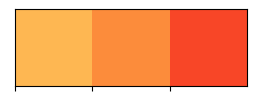

In [361]:
# Color 1
palette1 = sns.color_palette('YlOrRd', n_colors=total_lines+N*2)[N:-N]
# sns.palplot(palette1)
sns.palplot([palette1[0], palette1[len(palette1)//2], palette1[-1]])

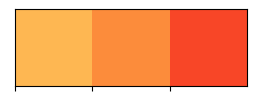

In [362]:
# Color 1R
palette1r = sns.color_palette('YlOrRd', n_colors=total_lines+N*2)[-N:N:-1]
# sns.palplot(palette1)
sns.palplot([palette1[0], palette1[len(palette1)//2], palette1[-1]])

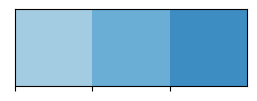

In [363]:
# Color 2
palette2 = sns.color_palette('Blues', n_colors=total_lines+N*2)[N:-N]
# sns.palplot(palette2)
sns.palplot([palette2[0], palette2[len(palette2)//2], palette2[-1]])

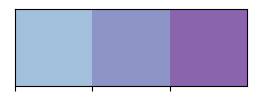

In [364]:
# Color 3
palette3 = sns.color_palette('BuPu', n_colors=total_lines+N*2)[N:-N]
# sns.palplot(palette3)
sns.palplot([palette3[0], palette3[len(palette3)//2], palette3[-1]])

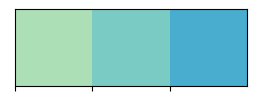

In [365]:
# Color 4
palette4 = sns.color_palette('GnBu', n_colors=total_lines+N*2)[N:-N]
# sns.palplot(palette4)
sns.palplot([palette4[0], palette4[len(palette4)//2], palette4[-1]])

In [366]:
def rgb01Hex(n, palette):
    c = palette[n]
    r = int(round(c[0] * 255))
    g = int(round(c[1] * 255))
    b = int(round(c[2] * 255))
    h = '#%02x%02x%02x' % (r, g, b)
    return h

In [367]:
path_colors_df = pd.DataFrame(columns=[
    'CITY1', 'CITY2', 'HEXCODE1', 'HEXCODE1R', 'HEXCODE2', 'HEXCODE3', 'HEXCODE4',
])
prev_g = paths_df.GROUP[0]
for curr_g in paths_df.GROUP[1:]:
    i = len(path_colors_df)
    if curr_g == prev_g:
        path_colors_df.loc[i] = [
            paths_df.loc[i, 'CITY'],
            paths_df.loc[i+1, 'CITY'],
            rgb01Hex(i, palette1),
            rgb01Hex(i, palette1r),
            rgb01Hex(i, palette2),
            rgb01Hex(i, palette3),
            rgb01Hex(i, palette4),
        ]
    else:
        path_colors_df.loc[i] = [
            paths_df.loc[i, 'CITY'],
            paths_df.loc[i+1, 'CITY'],
            'grey', 'grey', 'grey', 'grey', 'grey',
        ]
    prev_g = curr_g

In [368]:
path_colors_df.shape

(245, 7)

In [369]:
path_colors_df.head()

,CITY1,CITY2,HEXCODE1,HEXCODE1R,HEXCODE2,HEXCODE3,HEXCODE4
0,Moscow,Moscow,#feb852,#f84528,#a4cce3,#a3bfdc,#addfb7
1,Moscow,Leningrad,grey,grey,grey,grey,grey
2,Leningrad,Leningrad,#feb852,#f84628,#a4cce3,#a3bfdc,#addfb7
3,Leningrad,Moscow,grey,grey,grey,grey,grey
4,Moscow,Moscow,#feb651,#f84628,#a3cce3,#a2bfdb,#acdfb7


In [370]:
path_colors_df.tail()

,CITY1,CITY2,HEXCODE1,HEXCODE1R,HEXCODE2,HEXCODE3,HEXCODE4
240,Berlin,Berlin,#f94828,#feb651,#3e8ec4,#8c66af,#4aafd1
241,Berlin,Budapest,#f84628,#feb651,#3d8dc4,#8b65ae,#49add0
242,Budapest,Budapest,#f84628,#feb852,#3d8dc4,#8b65ae,#49add0
243,Budapest,Paris,grey,grey,grey,grey,grey
244,Paris,Paris,#f84628,#feb852,#3d8dc4,#8b65ae,#49add0


In [371]:
# sns.palplot(path_colors_df.HEXCODE1)

In [372]:
# sns.palplot(path_colors_df.HEXCODE1R)

In [373]:
# sns.palplot(path_colors_df.HEXCODE2)

In [374]:
# sns.palplot(path_colors_df.HEXCODE3)

In [375]:
# sns.palplot(path_colors_df.HEXCODE4)

## Saving data

In [376]:
points_df.to_csv('web/data/points4760.csv', index=False)
labels_df.to_csv('web/data/labels4760.csv', index=False)
paths_df.to_csv('web/data/paths4760.csv', index=False)
path_colors_df.to_csv('web/data/path_colors4760.csv', index=False)